The aim of this notebook is to asess whether we can achieve a pixel-perfect visualization
(in various visualizaiton toolkits) using the M4 data aggregation algorithm.

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys

sys.path.append("../")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from agg_utils.aggregators import M4Aggregator
from plotly_resampler.aggregation import MinMaxAggregator
from agg_utils.path_conf import dataset_dir
from agg_utils.fig_construction import construct_matplotlib_fig


## M4 & Aliasing

The following snippets demonstrat that it is infeasible to create a pixel-perfect visualization when anti-aliasing is used.

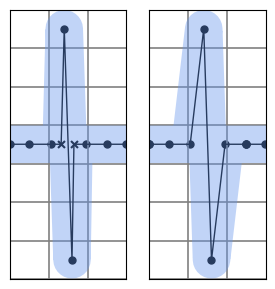

In [8]:
fig_width = 3
fig_height = 7
color_1 = "o"
color_2 = "x"
s = [
    (0.0, fig_height / 2, color_1),
    (0.5, fig_height / 2, color_1),
    (1.05, fig_height / 2, color_1),
    (1.32, fig_height / 2, color_2),
    (1.4, fig_height - 0.5, color_1),
    (1.6, 0.5, color_1),
    (1.65, fig_height / 2, color_2),
    (1.95, fig_height / 2, color_1),
    (2.5, fig_height / 2, color_1),
    (2.99, fig_height / 2, color_1),
]

factor = 2
fig, axs = plt.subplots(1, 2, figsize=(fig_width / factor * 2.2, fig_height / factor))

ax = axs[0]

# make the flat line lie perfectly in the middle of the range bins
tmp = pd.Series([x[1] for x in s], index=[x[0] for x in s])

# Major ticks
ax.set_xticks(np.arange(0, fig_width, 1))
ax.set_yticks(np.arange(0, fig_height, 1))

ax.grid(color="grey", linestyle="-", linewidth=1.2)
ax.tick_params(which="minor", bottom=False, left=False)


alpha = 0.2
ylim = 0, fig_height
xlim = 0, fig_width

# fmt: off
for i in range(len(s)):
    ax.scatter(tmp.index[i], tmp.values[i], s=25, color='black', marker=s[i][-1])
ax.add_line(lines.Line2D(tmp.index, tmp.values, lw=1, c="black", drawstyle="default", antialiased=True))
ax.add_line(lines.Line2D(tmp.index, tmp.values, lw=27, c='cornflowerblue', drawstyle='default', alpha=0.4, antialiased=True))
# 
ax.set_xlim(0, xlim[-1])
ax.set_ylim(ylim)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(which="major", bottom=False, left=False)

# -------------------- M4 --------------------
ax =axs[1]
s_m4 = ( M4Aggregator() ._aggregate(tmp, n_out=12))


# Major ticks
ax.set_xticks(np.arange(0, fig_width, 1))
ax.set_yticks(np.arange(0, fig_height, 1))

ax.grid(color="grey", linestyle="-", linewidth=1.2)
ax.tick_params(which="minor", bottom=False, left=False)

# fmt: off
ax.scatter(s_m4.index, s_m4.values, s=25, color='black')
ax.add_line(lines.Line2D( s_m4.index, s_m4.values, lw=1, c="black", drawstyle="default", antialiased=True))
ax.add_line(lines.Line2D(s_m4.index, s_m4.values, lw=27, c='cornflowerblue', drawstyle='default', alpha=0.4, antialiased=True))

ax.set_xlim(0, xlim[-1])
ax.set_ylim(ylim)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.tick_params(which="major", bottom=False, left=False)
plt.show()


The above plot already demonstrates that the M4 algorithm is not pixel-perfect, since the pixel shading surface of the aggregated time series (right) is not the same as the reference time series (left).

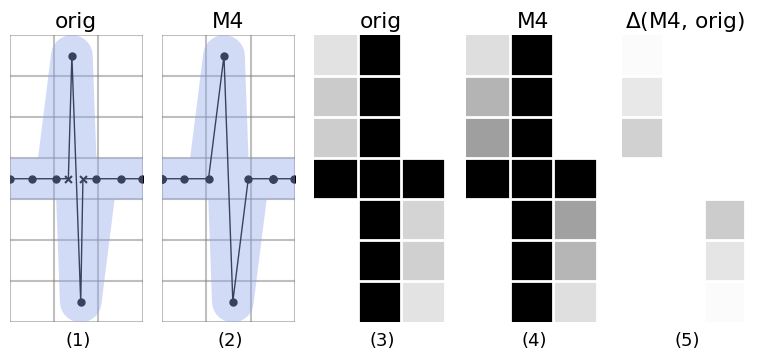

In [10]:
mpl.rcParams.update({"font.size": 13})
drawstyle = 'default'

construct_matplotlib_fig(
    tmp.index,
    tmp.values,
    save_path="tmp_images/matplotlib_tmp.png",
    **dict(aa=True, xlim=xlim, ylim=ylim, line_width_px=1),
    **dict(drawstyle=drawstyle, width=fig_width, height=fig_height),
    backend="agg",
)

construct_matplotlib_fig(
    s_m4.index,
    s_m4.values,
    save_path="tmp_images/matplotlib_tmp_m4.png",
    **dict(aa=True, xlim=xlim, ylim=ylim, line_width_px=1),
    **dict(drawstyle=drawstyle, width=fig_width, height=fig_height),
    backend="agg",
)

mpl_arr = plt.imread("tmp_images/matplotlib_tmp.png")
mpl_arr_m4 = plt.imread("tmp_images/matplotlib_tmp_m4.png")
fig, axs = plt.subplots(
    1, 5, figsize=(fig_width / factor * 5.2, fig_height / factor)
)  # , subplot_kw={'aspect': 1})


if True:
    ax = axs[0]
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # Major ticks
    ax.set_xticks(np.arange(0, fig_width + 1, 1))
    ax.set_yticks(np.arange(0, fig_height + 1, 1))

    ax.grid(color="grey", linestyle="-", linewidth=1.5, alpha=0.5)
    ax.tick_params(which="minor", bottom=False, left=False)

    alpha = 0.2
    ylim = 0, fig_height
    xlim = 0, fig_width

    # fmt: off
    # Put the data above the grid
    ax.set_axisbelow(True)
    for i in range(len(s)):
        ax.scatter(tmp.index[i], tmp.values[i], s=25, color='black', marker=s[i][-1])
    ax.add_line(lines.Line2D(tmp.index, tmp.values, lw=1, c="black", drawstyle="default", antialiased=True))
    ax.add_line(lines.Line2D(s_m4.index, s_m4.values, lw=30, c="#8EA7E9", drawstyle='default', alpha=0.4, antialiased=True))
    # 
    ax.set_xlim(0, xlim[-1])
    ax.set_ylim(ylim)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.tick_params(which="major", bottom=False, left=False)
    ax.set_title('orig')

# -------------------- M4 --------------------
if True:
    ax = axs[1]
    # disable zeroline
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    # [i.set_linewidth(0.2) for i in ax.spines.values()]
    s_m4 = M4Aggregator()._aggregate(tmp, n_out=12)

    # Major ticks
    ax.set_xticks(np.arange(0, fig_width + 1, 1))
    ax.set_yticks(np.arange(0, fig_height + 1, 1))

    ax.grid(color="grey", linestyle="-", linewidth=1.5, alpha=0.5)
    ax.tick_params(which="minor", bottom=False, left=False)

    # fmt: off
    # Put the data above the grid
    ax.set_axisbelow(True)
    ax.scatter(s_m4.index, s_m4.values, s=25, color='black')
    ax.add_line(lines.Line2D( s_m4.index, s_m4.values, lw=1, c="black", drawstyle="default", antialiased=True))
    ax.add_line(mpl.lines.Line2D(s_m4.index, s_m4.values, lw=30, c="#8EA7E9", drawstyle='default', alpha=0.4, antialiased=True))
    # c = "#8EA7E9"
    ax.set_xlim(0, xlim[-1])
    ax.set_ylim(ylim)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.tick_params(which="major", bottom=False, left=False)
    ax.set_title('M4')


def add_grid(ax, arr):
    ax.set_frame_on(False)

    # Minor ticks
    ax.set_xticks(np.arange(0.5, arr.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(0.5, arr.shape[0] - 1, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which="minor", color="white", linestyle="-", linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # hid the ticks but keep the grid
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(which="major", bottom=False, left=False)
    ax.set_ylim((fig_height - 0.5, -0.5))
    ax.set_xlim((-0.5, fig_width - 0.45))


axs[2].imshow(mpl_arr, aspect="auto")
add_grid(axs[2], mpl_arr)
axs[2].set_title("orig")

axs[3].imshow(mpl_arr_m4, aspect="auto")
add_grid(axs[3], mpl_arr_m4)
axs[3].set_title("M4")

axs[4].imshow(mpl_arr_m4 - mpl_arr)
axs[4].set_title("$\Delta$(M4, orig)")
add_grid(axs[4], mpl_arr_m4)

plt.tight_layout()

for i, ax in enumerate(axs, 1):
    ax.annotate(f"({i})", xy=(0.42, -0.08), xycoords="axes fraction")

# plt.savefig("test.pdf", bbox_inches="tight", pad_inches=1)
plt.savefig("../details/_figs/anti-aliasing.png", bbox_inches="tight")
plt.show()


## `M4` - error analysis - `MinMax` & `M4` - Matplotlib

This snippet compares the performance of `MinMax` and `M4` using the same image template

In [11]:
# Load the data
ball_speed_series = pd.read_parquet(dataset_dir / "ball_speed.parquet").set_index(
    "ts", drop=True
)["v"]

electrical_power_series = pd.read_parquet(
    dataset_dir / "electrical_power.parquet"
).set_index("ts")["mf03"]


diff: 945 	 ratio:  0.47 %


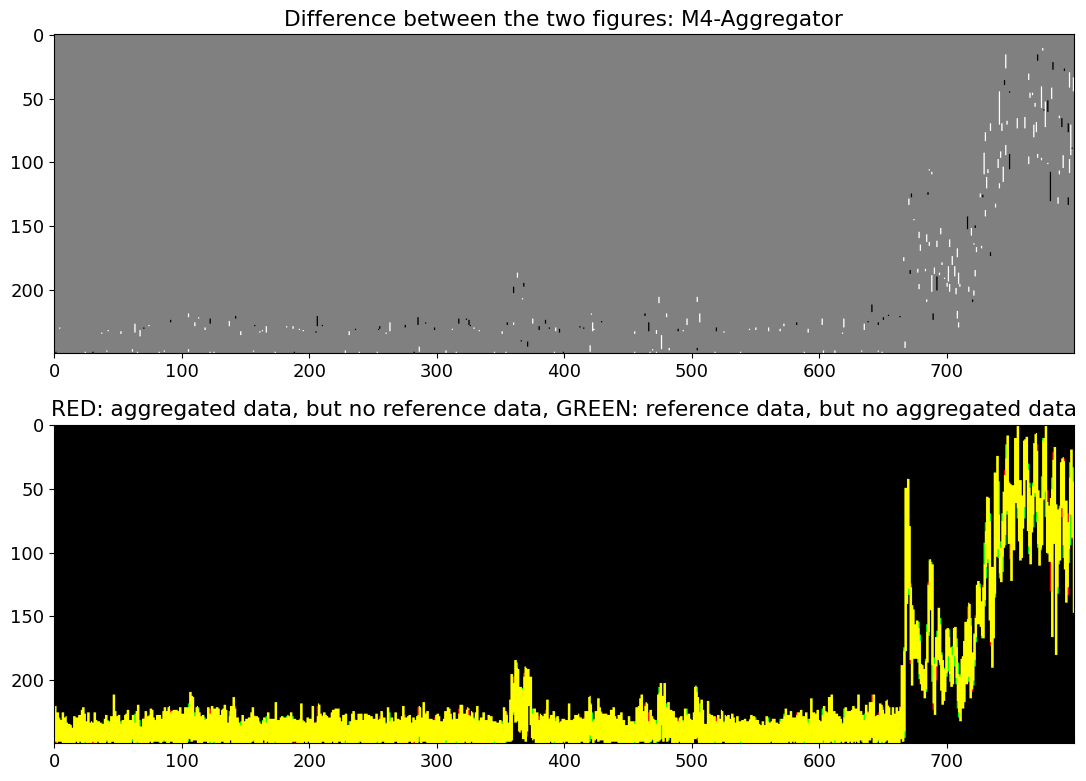

In [25]:
n = 160_000
aa = False
line_width = 1
ds = "default"
dpi = 96
backend = 'agg'

data = ball_speed_series.reset_index(drop=True).iloc[:n]

# Construct the reference figure
plt.switch_backend(backend)
fig_ref = construct_matplotlib_fig(
    data.index,
    data.values,
    save_path="../loc_data/reference.png",
    drawstyle=ds,
    **dict(dpi=dpi, width=800, height=250, aa=aa, line_width_px=line_width),
    return_fig=True,
    backend=backend,
)
plt.close(fig_ref)

# Aggregate the data using the M4Aggregator
agg = M4Aggregator(interleave_gaps=False).aggregate(data, 800 * 4)
fig_agg = construct_matplotlib_fig(
    agg.index,
    agg.values,
    save_path="../loc_data/aggregation.png",
    drawstyle=ds,
    **dict(dpi=dpi, width=800, height=250, aa=aa, line_width_px=line_width),
    return_fig=True,
    backend=backend,
)
plt.close(fig_agg)

# Compare the two figures and print out the number of pixels that are different
img_ref = 255 * plt.imread("../loc_data/reference.png")[:, :, 3]
img_agg = 255 * plt.imread("../loc_data/aggregation.png")[:, :, 3]
diff = int(np.abs(img_ref - img_agg).sum() / 255)
# NOTE: this comparison is performed over the whole image;
# not just where the data resides
print(
    "diff:",
    diff,
    "\t ratio: ",
    round(100 * diff / (img_agg.shape[0] * img_agg.shape[1]), 2),
    "%",
)

%matplotlib inline
# Visualize the difference between the two figures on a grayscale image
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
ax[0].imshow(img_ref - img_agg, cmap="gray")
ax[0].set_title("Difference between the two figures: M4-Aggregator")
# ax[0].colorbar()

# Visualize the difference between the two figures on a color image
# RED: aggregated data, but no reference data
# GREEN: reference data, but no aggregated data
ax[1].imshow(
    np.concatenate(
        (
            img_agg[:, :, None] / 255,  # RED
            img_ref[:, :, None] / 255,  # GREEN
            np.zeros((*img_agg.shape, 1)),
        ),
        axis=-1,
    ),
)
ax[1].set_title('RED: aggregated data, but no reference data, GREEN: reference data, but no aggregated data')
plt.tight_layout()
plt.show()

diff: 261 	 ratio:  0.13 %


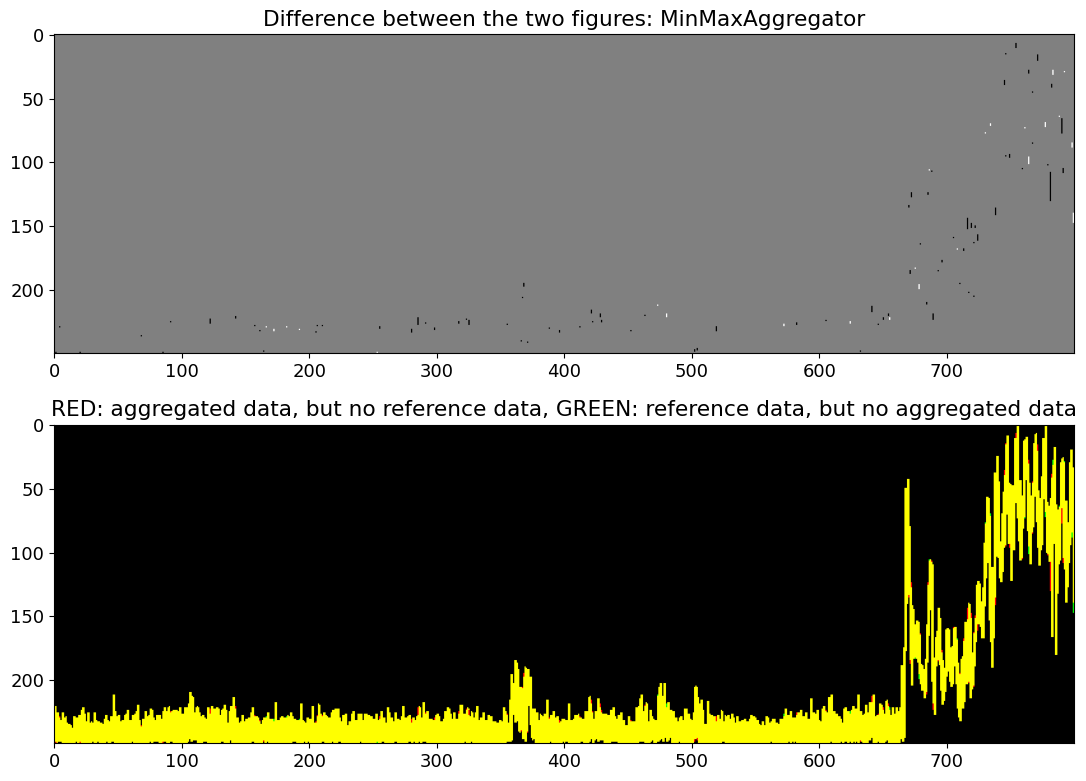

In [24]:
n = 160_000
aa = False
line_width = 1
ds = "default"
dpi = 96
backend = 'agg'

data = ball_speed_series.reset_index(drop=True).iloc[:n]

# Construct the reference figure
plt.switch_backend(backend)
fig_ref = construct_matplotlib_fig(
    data.index,
    data.values,
    save_path="../loc_data/reference.png",
    drawstyle=ds,
    **dict(dpi=dpi, width=800, height=250, aa=aa, line_width_px=line_width),
    return_fig=True,
    backend=backend,
)
plt.close(fig_ref)

# Aggregate the data using the M4Aggregator
agg = MinMaxAggregator(interleave_gaps=False).aggregate(data, 800 * 4)
fig_agg = construct_matplotlib_fig(
    agg.index,
    agg.values,
    save_path="../loc_data/aggregation.png",
    drawstyle=ds,
    **dict(dpi=dpi, width=800, height=250, aa=aa, line_width_px=line_width),
    return_fig=True,
    backend=backend,
)
plt.close(fig_agg)

# Compare the two figures and print out the number of pixels that are different
img_ref = 255 * plt.imread("../loc_data/reference.png")[:, :, 3]
img_agg = 255 * plt.imread("../loc_data/aggregation.png")[:, :, 3]
diff = int(np.abs(img_ref - img_agg).sum() / 255)
# NOTE: this comparison is performed over the whole image;
# not just where the data resides
print(
    "diff:",
    diff,
    "\t ratio: ",
    round(100 * diff / (img_agg.shape[0] * img_agg.shape[1]), 2),
    "%",
)

%matplotlib inline
# Visualize the difference between the two figures on a grayscale image
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
ax[0].imshow(img_ref - img_agg, cmap="gray")
ax[0].set_title("Difference between the two figures: MinMaxAggregator")
# ax[0].colorbar()

# Visualize the difference between the two figures on a color image
# RED: aggregated data, but no reference data
# GREEN: reference data, but no aggregated data
ax[1].imshow(
    np.concatenate(
        (
            img_agg[:, :, None] / 255,  # RED
            img_ref[:, :, None] / 255,  # GREEN
            np.zeros((*img_agg.shape, 1)),
        ),
        axis=-1,
    ),
)
ax[1].set_title('RED: aggregated data, but no reference data, GREEN: reference data, but no aggregated data')
plt.tight_layout()
plt.show()


### Testing figure transforms

Source: [transforms tutorial](https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html#transformations-tutorial)

- `ax.transData` transforms the data coordinates (i.e., data space) to display coordinates (i.e., pixel space) for the corresponding axes.

Source: [projections](https://matplotlib.org/stable/api/projections_api.html)
- This is the method/ functionality that resides within the `ax.transData` object.
 


In [6]:
# Thoe are the available projections; havent played with them yet but the default
# one is rectilinear
from matplotlib.projections import get_projection_names, get_projection_class

print("projection names:")
print(get_projection_names())


projection names:
['3d', 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear']


In [7]:
# Transform the data points to figure coordinates (pixels space)
agg_tpls = np.array(list(zip(agg.index, agg.values)))
data_tpls = np.array(list(zip(data.index, data.values)))
fig_pos_agg = pd.DataFrame(
    fig_ref.axes[0].transData.transform(agg_tpls), columns=["x", "y"]
)
fig_pos_data = pd.DataFrame(
    fig_ref.axes[0].transData.transform(data_tpls), columns=["x", "y"]
)

# Some print statements to verify the correctness of the transformation
# NOTE: The pixel space coordinates should be the same for the reference figure and the 
#       aggregated figure
for i, agg_tpl in enumerate(agg_tpls[:12]):
    if (i % 4) == 0:
        print("=" * 80)
    print("data space:       ", agg_tpl)
    print("pixel space REF:  ", fig_ref.axes[0].transData.transform([agg_tpl]))
    print("pixel space AGG:  ", fig_agg.axes[0].transData.transform([agg_tpl]))
    print("-" * 40)

# Verify whether the x-data points are correctly aligned with the pixel columns
# NOTE: For the M4 algorithm, this implies that the pixel column should increase with 1 
#       every 4 data points
fig_pos_agg["expected_col"] = fig_pos_agg.index // 4
assert all(fig_pos_agg["x"].astype("int") == fig_pos_agg["expected_col"])


data space:        [    0 90891]
pixel space REF:   [[ 0.         22.17970507]]
pixel space AGG:   [[ 0.         22.17970507]]
----------------------------------------
data space:        [    9 26502]
pixel space REF:   [[0.07200072 6.14304159]]
pixel space AGG:   [[0.07200072 6.14304159]]
----------------------------------------
data space:        [   111 342325]
pixel space REF:   [[ 0.88800888 84.80161948]]
pixel space AGG:   [[ 0.88800888 84.80161948]]
----------------------------------------
data space:        [   124 215281]
pixel space REF:   [[ 0.99200992 53.16016091]]
pixel space AGG:   [[ 0.99200992 53.16016091]]
----------------------------------------
data space:        [   125 254193]
pixel space REF:   [[ 1.00001    62.85154686]]
pixel space AGG:   [[ 1.00001    62.85154686]]
----------------------------------------
data space:        [   128 447774]
pixel space REF:   [[  1.02401024 111.06464776]]
pixel space AGG:   [[  1.02401024 111.06464776]]
-------------------------